In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
apple_training_complete = pd.read_csv('AAPL_train.csv')

In [83]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [85]:
features_set = []
labels = []
for i in range(60, 250):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [86]:
features_set, labels = np.array(features_set), np.array(labels)

In [87]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [88]:
!pip install keras

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [90]:
model = Sequential()

In [91]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [92]:
model.add(Dropout(0.2))

In [93]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [94]:
model.add(Dense(units = 1))

In [95]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [96]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
190/190 [==============================] - 3s 16ms/step - loss: 0.1441
Epoch 2/100
190/190 [==============================] - 1s 5ms/step - loss: 0.0336
Epoch 3/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0314
Epoch 4/100
190/190 [==============================] - 1s 5ms/step - loss: 0.0189
Epoch 5/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0133
Epoch 6/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0105
Epoch 7/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0068
Epoch 8/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0056
Epoch 9/100
190/190 [==============================] - 1s 5ms/step - loss: 0.0052
Epoch 10/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0060
Epoch 11/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0060
Epoch 12/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 13/100

190/190 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 100/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0025


In [97]:
apple_testing_complete = pd.read_csv('AAPL_second_test.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [98]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

In [99]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [100]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [101]:
test_features = []
for i in range(60,80):
    test_features.append(test_inputs[i-60:i, 0])

In [102]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [103]:
predictions = model.predict(test_features)

In [104]:
predictions = scaler.inverse_transform(predictions)

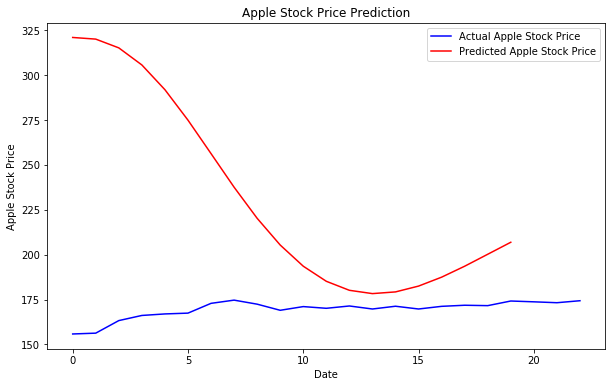

In [105]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()